# Mapping Interrogative Meanings: Cross-lingual Experiments With Transformer Representations of Questions

**Author:** Robin Kokot
**Course:** Scripting Languages (G0W95B)
**Academic year:** 2024/2025

---


## Introduction

In traditional approaches to sentence similarity, the goal is usually to determine how similar two sentences are in terms of their meaning or semantic content. This particular group of tasks, often called Semantic Textual Similarity (STS), is used in Natural Language Processing (NLP) as a way to either evaluate the performance of Language Models (LLMs) or to measure semantic overlap between text documents. There are different kinds of STS tasks, and a natural way to group them is by the specific type of similarity they focus on. Consider the following pairs of sentences that can be described as similar (in both cases, A is similar to B), but notice that each measure can be described differently:

1. A: This movie is worth watching. B: Watching this film will change your life!
2. A: John never married. B: John remained a bachelor.

We could say that the first two sentences are similar because they have a similar (positive) sentiment. However, the second pair of sentences is not similar in the same sense. This simple example illustrates that there are different kinds and degrees of semantic similairity. The kind of semantic similarity discussed here best illustrated with the following example:

3. A: Is this movie better or worse than the last one you saw? B: Isn't it this movie that is better than the last one?

One way of describing the similarity between these two questions is by pointing out that the propositional content of the two sentences is about similar things, and both sentences use the content in a similar function, namely to compare. To properly account for the way in which these sentences are similar we would have to map the content of the question in the semantic space of all sentences and approximate similarity with distance. In the case of sentences from different languages, performance usually correlates with the capacity to represent translations as having similar semantic content. Luckily for us, high-performing models allow us to investigate the ways in which the questions from the example above are distinct.

Modern NLP techniques rely heavily on text embeddings. These are dense vector representations of text that capture semantic and syntactic information. While there has been extensive research on *sentence* embeddings, understanding features of any sentence as a whole and how its linguistic properties are encoded in these embeddings hasn't been perfectly straightforward. Therefore, rather than casting a wide net over all types of sentences, focusing on questions allows us to probe vector representations of natural language sentences that share similar linguistic properties, in this case the context of interrogative intent. Interrogative intent is a pragmatic phenomenon which makes us understand the semantic content of questions as raising issues or eliciting information. This in contrast with the traditional way of considering questions as bearers of classical propositions which differ from indicative sentences in pragmatic effects alone. From this angle, what interest us about questions is the manner in which they raise an issue, and how this correlates with the features of propositional content.

More robust multilingual language model architectures are often placed in the spotlight due to the capacity of their vector embeddings to capture diverse semantic nuances in many languages. The main idea behind STS is to interpret similarity measures between vector representations of natural language sentences in a way that accounts for the degree to which the meanings and sometimes functions of these sentences overlap. Keeping this aim in mind, this report describes a new approach to STS which introduces a linguistic similarity measure that reflects typological variety in question formation patterns and overlap in interrogative intent. The main aim of this approach is to explore how multilingual LLMs represent the semantic content of questions. This area of research could benefit from more attention because understanding the relationship between sentences that express questions and internal vector representations of these sentences could help us better understand the nature of interrogative linguistic intent.

Consider this pair of questions:

1. A. Can I take my dog there? B. What is their pet policy?

Although these questions evoke similar interrogative intent and raise similar issues, their structural differences demonstrate that sufficiently understanding a question's meaning requires comprehending both the issue it raises (often associated with its propositional content) and how it raises that issue (related to its interrogative type). Based on these two requirements, we adopt a working assumption that morphosyntactic markers provide information about the kind of proposition at issue, while typological features indicate the type of answer that would resolve the issue. Keeping this assumption we set off to investigate the following research questions:

  a. Are questions that share a meaning and raise the same issue always represented similarly in multilingual language models?

  b. Do all languages converge into a single way of representing linguistic features of questions in these models?

We hypothesize that while questions with similar meanings and interrogative intent may exhibit similar vector representations, the specific linguistic features and typological differences across languages will lead to some divergence in how these questions are encoded in multilingual language models. By exploring these research questions, we seek to gain insights into the nature of interrogative linguistic intent and its representation in multilingual NLP models.







### Task Description: Multilingual Question Semantics


The primary focus of this study is to investigate whether multilingual language models represent semantically similar questions with similar internal representations. Pairwise sentence scoring tasks, which are widely used in NLP, often employ language models specifically designed for sentence processing. While the choice of model depends on the task at hand, most state-of-the-art LLMs relevant for STS tasks are essentially variations of the Bi-encoder architectures described in (Reimers, Gurevych 2019). Setting aside model differences for the moment, the usual pipeline for these tasks can be described in two steps:

1. Generate embeddings: Take a question as input and generate a sentence embedding that represents its semantic meaning in a vector space.

2. Compare embeddings: Calculate the cosine similarity between the target and source embeddings, where a higher score indicates greater semantic similarity between the questions.

3. Analyze Feature Co-occurrence: Relate the cosine similarity scores with the presence of different linguistic features of question sentences.

For this investigation, we have chosen the paraphrase-multilingual-MiniLM-L12-v2 model, which is provided by the Sentence Transformers library (https://www.sbert.net/). This multilingual sentence embedding model is based on the MiniLM architecture and has been fine-tuned on a multilingual paraphrase dataset. It generates semantically meaningful sentence embeddings across multiple languages, enabling efficient comparison of vector embeddings for translation pairs. The architecture is essentially a sentence transformer that uses a Siamese network structure with a MiniLM-L12 transformer, as described by (Reimers, Gurevych 2019).
Siamese network structures are an approach to sentence transformer architectures that aim to overcome the issue of generating high-quality, uniform-shape embeddings for variable-length sentences. (Reimers, Gurevych 2019) proposed an approach that uses a Siamese neural network architecture with a pre-trained BERT model to encode two sentences and compute their similarity based on the cosine distance between their embeddings. This approach is intended to address the limitations of traditional methods that rely on simple averaging or concatenation of word embeddings to represent sentences, which often fail to capture the complexity and nuance of natural language.

This report explores the representation of semantically similar questions in multilingual language models. It differs from approaches that attempt to understand the mapping of linguistic properties to text-vector embeddings. The task described in this report breaks from traditional approaches in that it does not evaluate the performance of language models when predicting sentence similarity, nor does it attempt to measure similarity between sentences or documents. The task described below investigates whether similar meanings in natural language determine the similarity between internal model representations and whether some linguistic features of natural language sentences have a greater effect on how meaning is represented in LLMs. Under the assumption that cosine similarity functions as an analogue of linguistic similarity.

By exploring the following pair of hypotheses and analyzing the variation in the representation of questions across languages, we want to understand how multilingual language models encode meaning and interrogative intent. This research has the potential to contribute to the development of more informed and interpretable multilingual NLP models for question-answering tasks.

**Typological hypotheses:**

Language specific word-order properties can affect the presence of some feature type combinations and correlate with the model's similarity scores. For example, sentence features common in SVO languages, such as clefting, may lead to lower similarity scores when comparing non SVO and SVO languages.


**Morphosyntactic hypotheses:**

The co-occurrence of specific morphosyntactic markers in a sentence relates to its interrogative type and affects the model's representation of semantic meaning measured by similarity scores.



### Dataset

A multilingual question pair dataset was developed to support the research. The primary goal was to create a resource that enables investigation into how linguistic features and typological differences influence the encoding of interrogative intent and content.

The dataset currently includes question pairs in five languages: Afrikaans (af), Arabic (ar), English (en), Indonesian (id), and Marathi (mr). These languages were selected to represent a range of language families and typological characteristics, while also considering the availability of parallel question-answer data from the NLLB corpus (Tiedemann 2012, Schwenk 2020). The final dataset consists of ~100k professionally translated question pairs compiled by scraping a variety of data domains. The data consists of translation pairs in (ar-en, mr-en, id-en, af-en). The english sentences of this dataset have been annotated with linguistic features from 2 categories. The first are morphosyntactic markers in the propositions of the question sentences, namely cleft, negation, modality, quantification, and comparison. The second category contains only question type features, namely either polar question, alternative question, wh-question, conditional question. Notably, each sentences can have several features from the first category, and a single type. Our research makes use of these features for investigating the interpretability of llm embeddings of these sentence pairs. First, the features in each sentence are encoded using a multi label binarizer to give multi label encodings, which are then passed on to a language model (sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2) and analysis is ultimately focused on the similarity between source and target(en) embeddings.

Each example includes the source question, its English translation, language identifier, and the annotated linguistic features for the information/proposition and the question type. The dataset is provided in a structured CSV format, along with the original JSON files and the preprocessing scripts for transparency and reproducibility. For more details about dataset creation, and to make custom size test sets, see Appendix A.

## Methodology

The experiment described in this report was largely influenced by the research carried out in the scope of the SBERT projects (sbert.net) and the HF sentence transformers organization. All of the standard models offered by Sentence Transformers have been extensively evaluated for their quality in embedding sentences (Performance Sentence Embeddings) and embedding search queries & paragraphs (Performance Semantic Search) (Devlin et al. 2019, Reimers, Gurevych 2019).

Our experimental setup follows the standard LLM embeddings comparison pipeline. However, the objective here is not to evaluate the model's performance in downstream tasks, but to investigate how the model represents questions in the embeddings space, and the relation between linguistic features and the internal vector representations. 


#### Embeddings:

Feature Encoding: Linguistic features in each question are encoded using a multi-label binarizer, resulting in multi-label encodings for each sentence. See appendix A for more details.

Sentence Encoding: Both source (non-english) and target (english) questions are passed to the 'sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2' model, which produces a sentence embedding that represents its semantic meaning in a vector space.

#### Similarity Measures:

We analyze the similarity between the source and target embeddings using cosine similarity, a widely used metric for comparing the semantic similarity of sentence embeddings. By comparing the cosine similarity scores across different linguistic features and question types, we aim to uncover patterns and relationships between these features and the model's ability to represent semantic similarity across languages.

#### Qualitative and Quantitative Analysis:

We conduct both qualitative and quantitative analyses of the results obtained from the similarity measures. The qualitative analysis involves examining specific examples and patterns in the data to gain insights into how the model represents semantic similarity across languages and how linguistic features influence these representations. The quantitative analysis includes statistical tests and visualizations to identify significant trends and relationships between linguistic features and embedding similarity. To that end, we:

1. investigate how mean cosine similarity scores and feature co-occurrences vary across the different languages.
  
2. evaluate how different morphosyntactic features influence the similarity scores, and explore the specific interaction of those features when questions are represented as embeddings.


## Experiments
The code below allows us to compute and visualize some common statistics for our dataset and experiment with different techniques and linguistic hypotheses. We begin by loading the model and setting up the working environment. For the purposes of this report, the embeddings have already been provided in the two / _embeddings_miniLM.npy files. Otherwise, they can be re-computed locally or in collab. The entire process for the full dataset should take about 1.5 hours if running on cpu an only a couple of minutes in a hosted runtime.

Once we have the embeddings we can move on to similarity calculation. Cosine Similarity is a metric used to measure the similarity between two non-zero vectors of an inner product space. It calculates the cosine of the angle between the two vectors. If the two vectors point in the same direction, the cosine similarity is 1 (perfectly similar) and if they are perpendicular, the cosine similarity is 0 (orthogonal, no similarity). We usually represent cosine similarity with the following formula (see Jurafsky and Martin 2024):

$\text{cosine}(\mathbf{v}, \mathbf{w}) = \frac{\mathbf{v} \cdot \mathbf{w}}{|\mathbf{v}| |\mathbf{w}|} = \frac{\sum_{i=1}^{N} v_i w_i}{\sqrt{\sum_{i=1}^{N} v_i^2} \sqrt{\sum_{i=1}^{N} w_i^2}}$

In the experiments, we will be using the numpy package and its integrated normalization and vector product functions. [np.dot and np.linalg.norm] use a similar method to derive the cosine values (see Harris et al. 2020):

$\text{cosine similarity}(\mathbf{s}, \mathbf{t}) = \frac{\sum_{i=1}^{n} s_i t_i}{\sqrt{\sum_{i=1}^{n} s_i^2} \sqrt{\sum_{i=1}^{n} t_i^2}}$, where s and t are the source and target embeddings respectively.


After computing the similarity values we can move on to testing some language specific hypothesis, and make use of additional word-order information to correlate similarity scores with typological diversity.

In [4]:
# import the required libraries

from sentence_transformers import SentenceTransformer # loads the model and generates embeddings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm as tqdm # optional, but useful for loading bar widgets
from scipy import stats

In [6]:
# 1. Load the annotated and encoded data that has been processed and re-sized

data = pd.read_csv('qtytp-balanced.csv')

# 2. Load model from sentence transformers, HF package allows us to do this without too much effort

model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')


In [ ]:
# generate embeddings for all examples in the data, one embedding per source question and one embedding per target question

# this may take some time

print("Generating embeddings for source questions...")
source_embeddings = model.encode(data['source'].tolist(), show_progress_bar=True)

print('Generating embeddings for target questions...')
target_embeddings = model.encode(data['target'].tolist(), show_progress_bar=True)

"""
  uncomment below print statements to see what the embeddings look like, ndim vector; I recommend only printing one embedding at a time because of size issues
  
"""
# print(f'source embedding:{source_embeddings[0]}')
# print(f'target embedding:{target_embeddings[0]}')

# uncomment the lines below to save the embeddings locally so we don't have to re-run the embedding generation process if the runtime ends

# np.save('source_embeddings_miniLM.npy', source_embeddings)
# np.save('target_embeddings_miniLM.npy', target_embeddings)

In [7]:
# if saved locally, load the embeddings in a new variable and set embedding collection arrays

data = pd.read_csv('qtytp-balanced.csv') # we load the original csv data with the results of the MLE encoder, see appendix A.

source_embeddings = np.load('source_embeddings_miniLM.npy') # these are important variables, effectively our embeddings
target_embeddings = np.load('target_embeddings_miniLM.npy')

s_emb = np.array(source_embeddings, dtype = float) # convert the embeddings into npy array to be used in cosine calculations
t_emb = np.array(target_embeddings, dtype = float)

In [8]:
# Calculate cosine similarity of all examples

similarities = []

""" 
    Main cosine calculation, iterates over the embeddings data and appends the similarity score to each pair. 
"""

for s_emb, t_emb in tqdm(zip(source_embeddings, target_embeddings)):
    sim = np.dot(s_emb, t_emb) / (np.linalg.norm(s_emb) * np.linalg.norm(t_emb))
    similarities.append(sim)

# adds the list of similarity scores to the original data with annotations and encodings

data['cosine_similarity'] = similarities
data.to_csv('questions_similarities.csv', index=False)

print('Results of similarity analysis:')

print(data['cosine_similarity'].describe()) # helpful function to give key statistics about the data column

# save the data with similarities (excluding the embeddings)
data.drop(columns=[col for col in data.columns if col.startswith('q') or col.startswith('source_q')], inplace=True)
data.to_csv('questions_with_similarities_miniLM.csv', index=False)



0it [00:00, ?it/s]

98036it [00:03, 27363.40it/s]


ValueError: Length of values (98036) does not match length of index (157592)

In [112]:
""" 
  Overview of similarity statistics per language, to get a better understanding of how mean scores vary. 
"""
print("\nLanguage-specific Similarity Stats:")

for lang in data['language'].unique():
    
    lang_data = data[data['language'] == lang]
    lang_sims = lang_data['cosine_similarity']
    
    print(f"\n{lang.upper()}:") #

    print(f"Mean similarity: {lang_sims.mean():.3f}")
    print(f"Max similarity: {lang_sims.max():.3f}")
    print(f"Min similarity: {lang_sims.min():.3f}")
    
    high_idx = lang_sims.argmax() # takes the sentence at the index with the highes value for inspection
    print(f"Highest similarity pair:")
    print(f"Source: {lang_data.iloc[high_idx]['source']}")
    print(f"Target: {lang_data.iloc[high_idx]['target']}")
    
    low_idx = lang_sims.argmin() # same for lowest
    print(f"Lowest similarity pair:")
    print(f"Source: {lang_data.iloc[low_idx]['source']}")
    print(f"Target: {lang_data.iloc[low_idx]['target']}")


Language-specific Similarity Stats:

MR:
Mean similarity: 0.686
Max similarity: 0.996
Min similarity: -0.116
Highest similarity pair:
Source: किती लोक रशियात राहतात?
Target: How many people live in Russia?
Lowest similarity pair:
Source: परंतु, जगातील काही ठिकाणी एखाद्या वस्तूसाठी किंवा सेवेसाठी पुरुषांपेक्षा महिलांना जास्त किंमत चुकवावी लागते, हे तुम्हाला माहीत आहे का?
Target: Did you know that there are several instances when women pay more than men for the same goods and services?

AR:
Mean similarity: 0.894
Max similarity: 0.997
Min similarity: 0.113
Highest similarity pair:
Source: الإنجليزية (en) Can ‘Old Age Security 2020’ guarantee pensions?
Target: Can ‘Old Age Security 2020’ guarantee pensions?
Lowest similarity pair:
Source: هل يمكنك ان تاتي باية كريمة من القران لمنكر امامة علي رضي الله عنه؟؟
Target: Can anyone be so bold as to turn away God’s wrath?

AF:
Mean similarity: 0.765
Max similarity: 0.999
Min similarity: -0.000
Highest similarity pair:
Source: Waarom is Huawei Ma

In [ ]:
#visual distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='cosine_similarity', bins=30, color='grey')
sns.set_style("ticks")
plt.title('Distribution of question pairs with respect to their similarity')
plt.xlabel('Cosine Similarity (higher = more similar)')
plt.ylabel('Number of question pairs')
plt.show()

The initial calculation of similarity between the source (lang) and target (en) questions reveals a generally high degree of semantic alignment between translated question pairs across the multilingual dataset, with an overall mean similarity of 0.805.

Overall Statistics for Question Pairs
| mean  | min    | 25%   | 50%   | 75%   | max   |
| ----- | ------ | ----- | ----- | ----- | ----- |
| 0.805 | -0.166 | 0.724 | 0.862 | 0.932 | 0.999 |

Language Statistics
|     | Mean  | Max   | Min    |
| --- | ----- | ----- | ------ |
| AF  | 0.765 | 0.99  | 0      |
| AR  | 0.894 | 0.997 | 0.113  |
| ID  | 0.920 | 0.996 | 0.139  |
| MR  | 0.686 | 0.996 | -0.116 |

Although this suggests the model effectively captures shared meaning across languages, the overall performance is slightly worse than the results of the same analysis on a similar dataset that contains all sentences. The cosine similarity statistics for the dataset of 100k sentences in the same languages, with the same sample distribution show that performance on question sentences actually slightly decreases overall, mainly due to performance decrease in Afrikaans and Marathi.

| mean  | min   | 25%    | 50%   | 75%   | max   |
| ----- | ----- | ------ | ----- | ----- | ----- |
| 0.835 | 0.166 | -0.110 | 0.778 | 0.951 | 0.999 |

and the language specific values:

|     | Mean  | Max   | Min    |
| --- | ----- | ----- | ------ |
| AF  | 0.822 | 1.0   | -0.034 |
| AR  | 0.893 | 0.999 | -0.084 |
| ID  | 0.918 | 0.999 | -0.062 |
| MR  | 0.711 | 0.995 | -0.110 |


These findings show good performance in overall semantic understanding but also reveal language-specific challenges and limitations in handling questions.

### Analyses:

We analyse the data by making assumptions from two different points of view. The first makes some basic typological assumptions, namely it assumes that properties of languages such as word order patterns influence the presence of some feature-type combinations and affect the similarity scores.

The second set of assumptions takes a fine-grained view of feature-type relationships in interrogative sentences and investigates which pairs of features are more or less common, and whether there are concrete patterns in how the model represents their meaning.




### Category 1 Analyses - Typological effects



In [3]:
""" 
    We begin by adding the word order properties to the dataset for easier visualization. This allows us to map the similarity scores to an extra data column for a broad overview of language effect.

"""
def add_typological_features(data):
    typological_features = {
        'mr': {'word_order': 'SOV'},
        'id': {'word_order': 'SVO'},
        'ar': {'word_order': 'VSO'},
        'af': {'word_order': 'SVO'}
    }
    for lang, props in typological_features.items():
        data[f'word_order_{lang}'] = data['language'].apply(lambda x: 1 if x == lang else 0) # add each language as a new col
    data['word_order'] = data['language'].map(lambda x: typological_features[x]['word_order'])
    print("Word Order features added to the dataframe")
    return data

data = add_typological_features(data)

# 4. Utility function to calculate feature count
def add_feature_count(data):
    feature_cols = [col for col in data.columns if col.startswith('f1_')]
    data['feature_count'] = data[feature_cols].sum(axis=1)
    print("Feature counts added to the dataframe")
    return data

data = add_feature_count(data)

NameError: name 'data' is not defined

##### 1. Feature Distribution


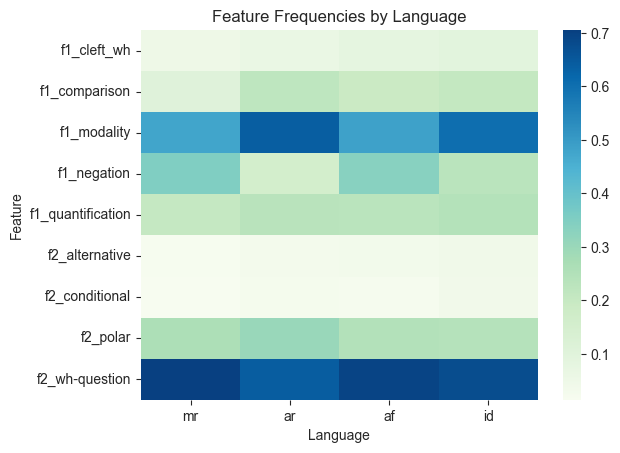

In [11]:
f1_cols = [col for col in data.columns if col.startswith('f1_')]
f2_cols = [col for col in data.columns if col.startswith('f2_')]

all_feature_cols = f1_cols + f2_cols

feature_by_lang = pd.DataFrame()

for lang in data['language'].unique():
    lang_data = data[data['language'] == lang]
    feature_freqs = lang_data[all_feature_cols].mean()
    feature_by_lang[lang] = feature_freqs


sns.heatmap(feature_by_lang, cmap='GnBu')
plt.title('Feature Frequencies by Language')
plt.xlabel('Language')
plt.ylabel('Feature')

plt.plot()
plt.show()

The heatmap shows feature frequencies across different languages (mr, ar, af, id). The most prominent patterns are:

**f2_wh-question** (WH-questions like "what," "where," "who") shows consistently high frequency (dark blue) across all languages, **f1_modality** also shows moderate to high frequency across languages, **f1_negation** shows moderate frequency with some variation across languages.

Some features like f1_cleft and f2_alternative show very low frequencies (light colors) across all languages.

##### 2. Question types per language family

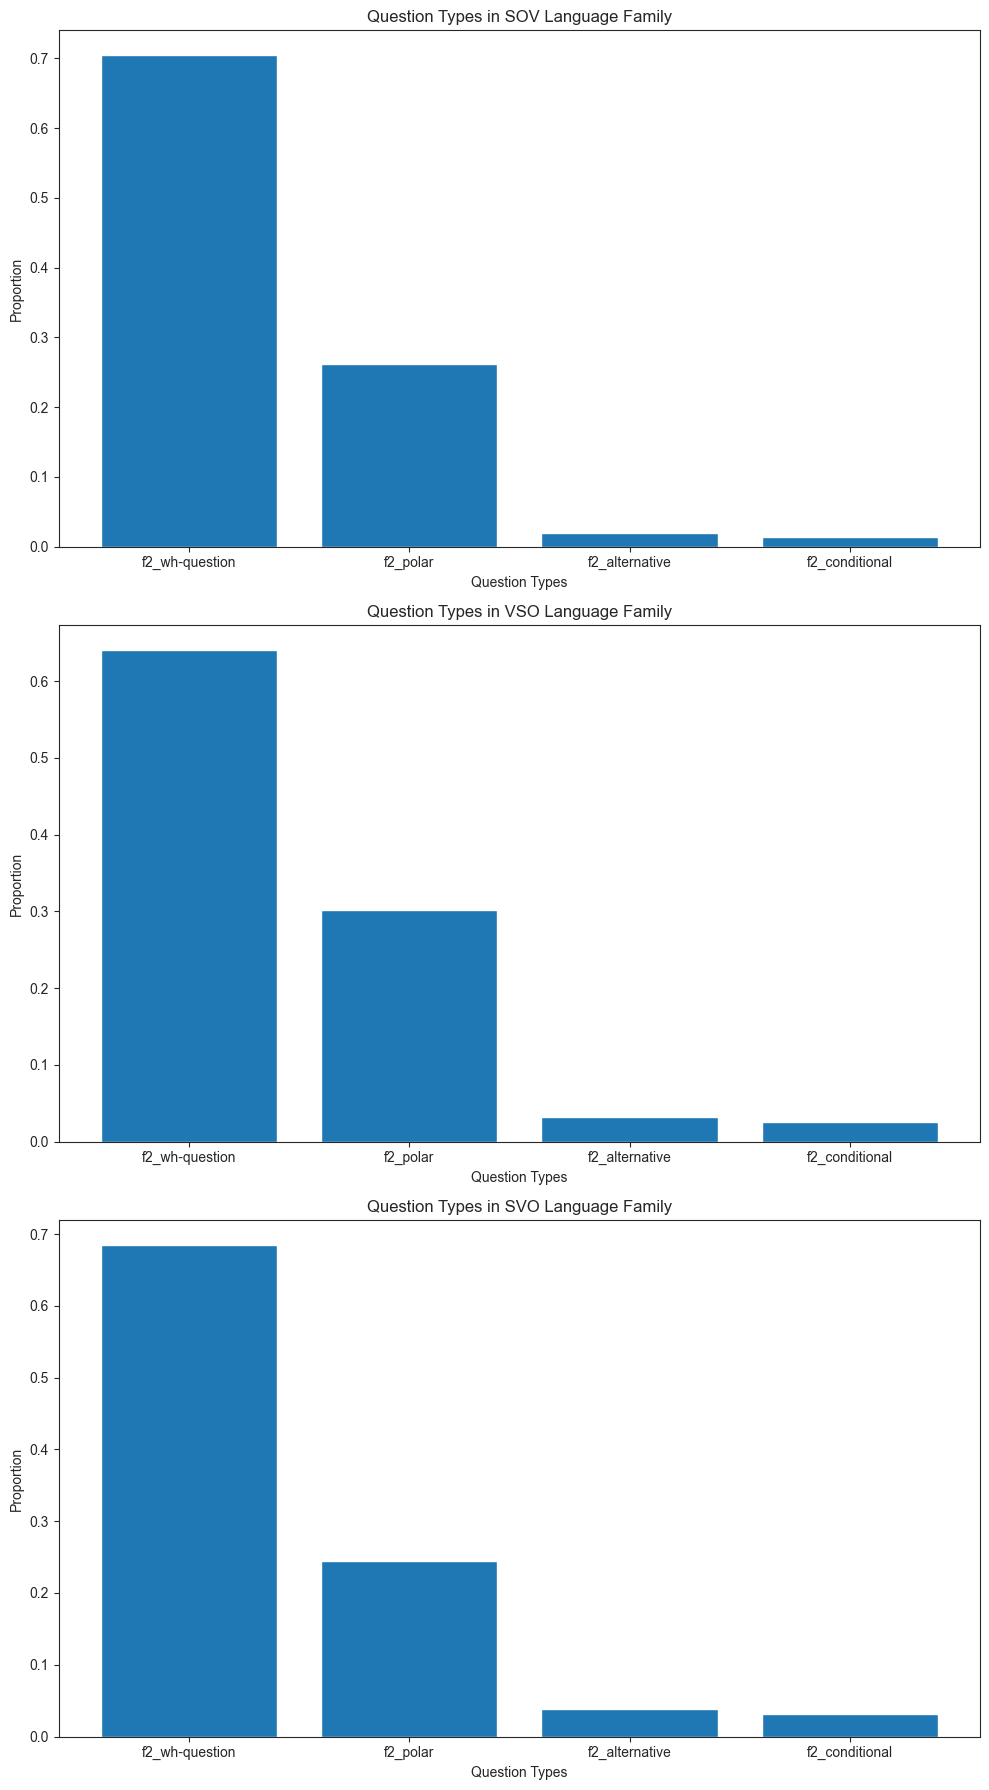

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


# Analyze question types per language family
question_types = ['f2_wh-question', 'f2_polar', 'f2_alternative', 'f2_conditional']
language_families = data['word_order'].unique()

fig, axs = plt.subplots(len(language_families), 1, figsize=(10, 6*len(language_families)))

for i, family in enumerate(language_families):
    family_data = data[data['word_order'] == family]
    
    # ratio of each question type within the language family
    question_type_props = family_data[question_types].mean()
    
    # bar plot per language family
    axs[i].bar(question_types, question_type_props)
    axs[i].set_title(f'Question Types in {family} Language Family')
    axs[i].set_xlabel('Question Types')
    axs[i].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

There's a consistent pattern across all three word order families (SOV, VSO, SVO):

WH-questions (f2_wh-question) are overwhelmingly dominant, making up about 65-70% of questions
Polar questions (f2_polar) are the second most common, comprising roughly 25-30%
Alternative and conditional questions are relatively rare, each making up less than 5% of the total.

##### 3. Negation effects per language

In [13]:

for lang in data['language'].unique():
    neg_data = data[(data['language'] == lang) & (data['f1_negation'] == 1)]
    non_neg_data = data[(data['language'] == lang) & (data['f1_negation'] == 0)]
    
    neg = neg_data['cosine_similarity']
    non_neg = non_neg_data['cosine_similarity']
    
    print(f"\n{lang.upper()}:")
    print(f"With negation: {neg.mean():.3f} ± {neg.std():.3f} (n={len(neg)})")
    if len(neg_data) > 0:
        example_neg = neg_data.sample(1)
        print(f"Example: {example_neg['source'].values[0]} | {example_neg['target'].values[0]}")
    
    print(f"Without negation: {non_neg.mean():.3f} ± {non_neg.std():.3f} (n={len(non_neg)})")
    if len(non_neg_data) > 0:
        example_non_neg = non_neg_data.sample(1)
        print(f"Example: {example_non_neg['source'].values[0]} | {example_non_neg['target'].values[0]}")


MR:
With negation: 0.682 ± 0.182 (n=11011)
Example: . . पण. . . इथे आल्यानंतर मी इथे जे विश्व पाहिले ना बाबा? | When you don't know the world I've come to see?
Without negation: 0.689 ± 0.186 (n=20345)
Example: तुम्हाला काय वाटतंय मी चेष्टा करतोय ? | What is it that you think I am trying?

AR:
With negation: 0.887 ± 0.088 (n=3083)
Example: هل لأني ولدت في اليابان فليس من حقي أن أغني سوى أغاني يابانية ؟ | Had I, born in Japan, no choice but to sing Japanese songs?
Without negation: 0.895 ± 0.086 (n=16323)
Example: س: إذا قمت بتصنيع سلع ذات جودة رديئة ، فهل ستعيد أموالنا؟ | Q: If you make poor quality goods, will you refund our fund?

AF:
With negation: 0.747 ± 0.144 (n=7396)
Example: Afgesien van die vraag waarom so baie lae-inkomste werkers verdien nie genoeg geld om hul gesinne te voed nie, wat beteken dit vir kinders, bejaardes en gestremdes om meer te wees, soos Mulvaney dit stel, "in beheer van hul lewens"? | Leaving aside the question of why so many low-income workers don't earn 




Consistent Pattern holds cross all languages, sentences with negation show lower semantic similarity scores compared to non-negated sentences, altthough it is relatively small, and of questionable relevance.

Still, the difference is relatively consistent, with negation typically reducing similarity by about 0.04-0.05 points
Variance: Standard deviations are fairly consistent across languages (around 0.14-0.16), suggesting similar variability in how negation affects meaning across languages. Similarity pattern across different language families suggests this might be a universal feature of how negation affects semantic meaning

This suggests that negation consistently adds complexity to semantic relationships in a way that is remarkably similar across different language families. The lower similarity scores with negation make intuitive sense, as negation fundamentally alters the meaning of a statement and can make semantic relationships more complex.


### Category 2 Analyses - Morphosyntactic effects

In the second set of analyses we examine the interaction between interrogative intent (determined by question type) and semantic content (related to propositional features) through various feature combinations that demonstrate both alignment patterns and feature incompatibilities. We look out for specific linguistic features which have an effect on the model's embeddings by considering isolated pairs, and observing the co-occurrence rates. This approach helps us identify the most frequent features and patterns, but also to point out incompatible or rare patterns.

##### 1. Feature - Type comparisons
First we look at all possible pairs of features and note some observations in their frequency rates. 



In [ ]:

def analyze_feature_pair(data, feature1, feature2, pair_name):
    """ 
        This function plots the co-occurrence rates for all possible pairs of features in our dataset.
    
    """
    # Overall statistics
    total_samples = len(data)
    f1_total = data[feature1].sum()
    f2_total = data[feature2].sum()
    both_total = ((data[feature1] == 1) & (data[feature2] == 1)).sum()

    print("\nOverall Statistics:")
    print(f"Total samples: {total_samples}")
    print(f"Feature 1 ({feature1}) occurrences: {f1_total} ({f1_total/total_samples:.2%})")
    print(f"Feature 2 ({feature2}) occurrences: {f2_total} ({f2_total/total_samples:.2%})")
    print(f"Co-occurrences: {both_total} ({both_total/total_samples:.2%})")

    # co-occurrences under independence
    expected_cooc = (f1_total/total_samples) * (f2_total/total_samples) * total_samples
    print(f"Expected co-occurrences: {expected_cooc:.2f}")
    print(f"Observed/Expected ratio: {both_total/expected_cooc:.2f}")

    # language-specific analysis
    print("\nLanguage-specific Analysis:")
    lang_stats = []
    for lang in data['language'].unique():
        lang_data = data[data['language'] == lang]
        lang_total = len(lang_data)
        lang_f1 = lang_data[feature1].sum()
        lang_f2 = lang_data[feature2].sum()
        lang_both = ((lang_data[feature1] == 1) & (lang_data[feature2] == 1)).sum()

        print(f"\n{lang.upper()}:")
        print(f"Total samples: {lang_total}")
        print(f"{feature1}: {lang_f1} ({lang_f1/lang_total:.2%})")
        print(f"{feature2}: {lang_f2} ({lang_f2/lang_total:.2%})")
        print(f"Co-occurrences: {lang_both} ({lang_both/lang_total:.2%})")

        # similarity scores for co-occurrences
        if lang_both > 0:
            cooc_sims = lang_data[
                (lang_data[feature1] == 1) &
                (lang_data[feature2] == 1)
            ]['cosine_similarity']
            print(f"Mean similarity: {cooc_sims.mean():.3f} ± {cooc_sims.std():.3f}")

        lang_stats.append({
            'language': lang,
            'f1_freq': lang_f1/lang_total,
            'f2_freq': lang_f2/lang_total,
            'cooc_freq': lang_both/lang_total
        })

    return lang_stats

def create_heatmap(data, feature_pairs): # define heatmap function
    heatmap_data = pd.DataFrame(index=data['language'].unique()) # initialize a df

    for f1, f2, name in feature_pairs: # iterate over pairs
        heatmap_data[f'{f1} + {f2}'] = 0

        for lang in data['language'].unique(): # compute co-occurrence rates
            lang_data = data[data['language'] == lang]
            lang_both = ((lang_data[f1] == 1) & (lang_data[f2] == 1)).sum()
            heatmap_data.loc[lang, f'{f1} + {f2}'] = lang_both
    

    plt.figure(figsize=(12, 5))

    
 # plotting helpers and custom cosmetics for the visuals

    sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="GnBu")
    plt.title('Co-occurrence of Feature Pairs by Language')
    plt.xlabel('Feature Pairs')
    plt.ylabel('Language')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

def plot_feature_frequencies(lang_stats_list, feature_pairs):
    lang_df = pd.DataFrame(lang_stats_list)
    lang_df = lang_df.melt(id_vars='language', var_name='feature', value_name='frequency')
    lang_df['feature_pair'] = lang_df['feature'].apply(lambda x: next((name for f1, f2, name in feature_pairs if x in [f'f1_freq', f'f2_freq', f'cooc_freq']), ''))
    
    plt.figure(figsize=(12, 5))
    sns.catplot(x='language', y='frequency', hue='feature', col='feature_pair', data=lang_df, kind='bar', height=4, aspect=1.5)

    
    plt.show()

# pairs to analyze
feature_pairs = [
    ('f1_negation', 'f2_alternative', 'Negation-Alternative'),
    ('f1_negation', 'f2_polar', 'Negation-Polar'),
    ('f1_negation', 'f2_conditional', 'Negation-Conditional'),
    ('f1_negation', 'f2_wh-question', 'Negation-Wh-question'),

    ('f1_quantification', 'f2_polar', 'Quantification-Polar'),
    ('f1_quantification', 'f2_conditional', 'Quantification-Conditional'),
    ('f1_quantification', 'f2_wh-question', 'Quantification-Wh-question'),
    ('f1_quantification', 'f2_alternative', 'Quantification-Alternative'),
    
    ('f1_modality', 'f2_alternative', 'Modality-Alternative'),
    ('f1_modality', 'f2_polar', 'Modality-Polar'),
    ('f1_modality', 'f2_conditional', 'Modality-Conditional'),
    ('f1_modality', 'f2_wh-question', 'Modality-Wh-question'),

    ('f1_comparison', 'f2_alternative', 'Comparison-Alternative'),
    ('f1_comparison', 'f2_polar', 'Comparison-Polar'),
    ('f1_comparison', 'f2_conditional', 'Comparison-Conditional'),
    ('f1_comparison', 'f2_wh-question', 'Comparison-Wh-question'),

    ('f1_cleft', 'f2_alternative', 'Cleft-Alternative'),
    ('f1_cleft', 'f2_polar', 'Cleft-Polar'),
    ('f1_cleft', 'f2_conditional', 'Cleft-Conditional'),
    ('f1_cleft', 'f2_wh-question', 'Cleft-Wh-question'),
]

lang_stats_list = [] # initialize an empty list for language statistics
for f1, f2, name in feature_pairs: # iterate over pairs and call the analyze function
    lang_stats = analyze_feature_pair(data, f1, f2, name) 
    lang_stats_list.extend(lang_stats)

create_heatmap(data, feature_pairs) # generate heatmap for better visuals

Initial co-occurrence analysis reveals several interesting patterns in how linguistic features interact and influence semantic representations across languages. Most notably, quantification with wh-questions shows the highest co-occurrence rates (14-17% across languages) and consistently high similarity scores (0.7-0.92), suggesting these features are frequently related.

In contrast, negation exhibits interesting effects: while relatively common (27.86% overall), its co-occurrence with polar questions (4.93%) is low, and it tends to reduce similarity scores across all feature combinations. 

Modal-conditional pairs show higher than expected co-occurrence with notably high similarity scores (0.682-0.919), indicating strong semantic coherence. 

Alternative questions demonstrate limited co-occurrence with most features (1-2%), but when they do occur, they show surprisingly high similarity scores in Arabic (0.88-0.92) and Indonesian (0.90-0.92) compared to Marathi (0.62-0.64) and Afrikaans (0.73-0.80), suggesting language-specific handling of alternative constructions. 

Cleft constructions, while relatively rare (7.20%), show distinct patterns with polar questions that vary significantly by language, with Indonesian showing the highest similarity scores (0.909) and Marathi the lowest (0.639), implying that the model's capture of complex syntactic structures is language-dependent. These patterns suggest that the model has learned nuanced linguistic relationships and semantic relationships, but with notable variation across different languages.

Notably high co-occurrence of negation and alternative question features in Indonesian compared to Arabic and Afrikaans. This suggests that Indonesian speakers rely more heavily on combining negation with explicit alternatives when posing questions, a pattern that is less prevalent in the other languages studied.
Equally illuminating are the feature pairs that rarely intersect. The scarcity of cleft constructions alongside alternative questions in Afrikaans and Arabic hints at underlying constraints that limit the expressibility of certain question types in these languages.

##### 2.  Feature likelihood correlations

The heatmap below shows general feature patterns over the whole dataset. It shows feature correlation for an arbitrary question, namely the occurrence rates for features within any given question. It indicates some patterns, most notably the prevalence of wh- and polar questions inquiring about modality, comparison, and quantification are the most common features. 

For example, the 0.41 between "f1_modality" and "f2_wh-question" means these features frequently co-occur in individual questions, while the <0.03 between cleft, comparison, and quantification **conditional** questions indicates these features are quite rare.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Load data
data = pd.read_csv('questions_with_similarities_miniLM.csv')

# Get feature columns
feature_cols = [col for col in data.columns if col.startswith('f1_') or col.startswith('f2_')]

# Create feature co-occurrence matrix
co_occurrence = np.zeros((len(feature_cols), len(feature_cols)))

# Calculate co-occurrences
for i, f1 in enumerate(feature_cols):
    for j, f2 in enumerate(feature_cols):
        # Calculate normalized co-occurrence
        both = ((data[f1] == 1) & (data[f2] == 1)).sum()
        total = ((data[f1] == 1) | (data[f2] == 1)).sum()
        co_occurrence[i, j] = both/total if total > 0 else 0

# Convert to DataFrame for better visualization
co_occurrence_df = pd.DataFrame(co_occurrence,
                              index=feature_cols,
                              columns=feature_cols)

feature_similarity = np.zeros((len(feature_cols), len(feature_cols)))

plt.figure(figsize=(15, 10))

# Plot 1: Feature co-occurrence heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_df,
            cmap='YlOrRd',
            annot=True,
            fmt='.2f',
            square=True)  # Make cells square
plt.title('Feature Co-occurrence Matrix')
plt.xticks(rotation=45, ha='right')  # Align rotated labels
plt.yticks(rotation=0)





FileNotFoundError: [Errno 2] No such file or directory: 'questions_with_similarities_miniLM.csv'

##### 3. Complexity and Implicature

 Cleft constructions and comparisons involve intricate syntactic structures that allow speakers to highlight specific elements and draw contrasts, showcasing how languages can manipulate word order and clause structure to convey emphasis and facilitate information-seeking. On the other hand, the co-occurrence of quantification and modality in questions demonstrates how languages employ various strategies to express nuances of quantity, possibility, and certainty, which can give rise to scalar implicatures and convey subtle shades of meaning beyond the literal content of the question. 

 Consider the following example of a cleft question and a question which gives rise to scalar implicature:

 A. Is it John who is coming later? B. Did some of the students come to the lecture?

 First question puts emphasis on "John" as the focus of the question. It singles out the specific person that the speaker is inquiring about, and the second question demonstrates scalar implicature with the quantifier "some". By asking if *some* of the students came to the lecture, the speaker implies that not all of the students attended.


Syntactic Complexity: Cleft Constructions and Comparison
Total cleft questions: 7055 (7.2%)
Total comparison questions: 17087 (17.4%)
Percentage of all questions that are cleft and comparison: 0.9%

Language distribution of cleft and comparison questions:
id: 38.1%
af: 28.4%
ar: 24.2%
mr: 9.3%

Examples of cleft and comparison questions:
MR - Cleft Comparison: आपण आपल्या क्षेत्रातील तज्ञ आहात किंवा एखाद्या विशिष्ट विषय किंवा कौशल्याबद्दल आपल्याला सरासरी व्यक्तीपेक्षा अधिक माहिती आहे? | Is it accurate to say that you are a specialist in your field, or do you know more than the normal individual about a particular subject or aptitude?
AR - Cleft Comparison: لماذا من الأفضل ، بطريقة ما ، أن يكون مصابًا في محاولة تفجيره من أن يُحكم عليه بالسجن بسبب قيامه بمثل هذه المحاولة؟ | Why is it better, in a way, that he is injured by his attempted bombing than that he is sentenced to jail for having made such an attempt?
AF - Cleft Comparison: Noudat jy ouer en meer volwasse is, is dit tyd om jouse

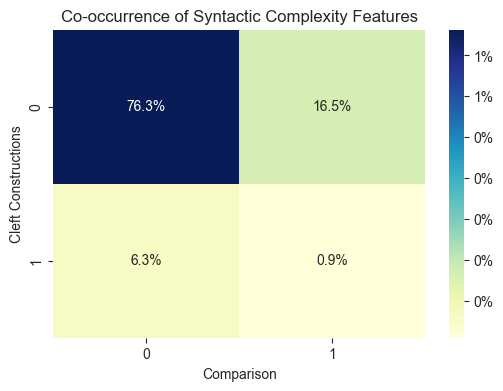

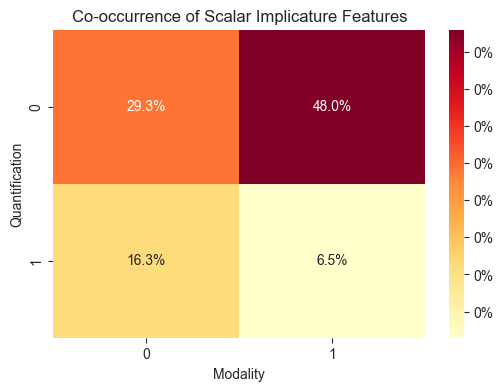

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Syntactic Complexity: Cleft Constructions and Comparison
print("\nSyntactic Complexity: Cleft Constructions and Comparison")
cleft_comparison = len(data[(data['f1_cleft_wh'] == 1) & (data['f1_comparison'] == 1)])
total_cleft = len(data[data['f1_cleft_wh'] == 1])
total_comparison = len(data[data['f1_comparison'] == 1])
total_questions = len(data)

print(f"Total cleft questions: {total_cleft} ({total_cleft/total_questions*100:.1f}%)")
print(f"Total comparison questions: {total_comparison} ({total_comparison/total_questions*100:.1f}%)")
print(f"Percentage of all questions that are cleft and comparison: {cleft_comparison/total_questions*100:.1f}%")

print("\nLanguage distribution of cleft and comparison questions:")
cleft_comparison_lang_dist = data[(data['f1_cleft_wh'] == 1) & (data['f1_comparison'] == 1)]['language'].value_counts(normalize=True) * 100
for lang, pct in cleft_comparison_lang_dist.items():
    print(f"{lang}: {pct:.1f}%")

print("\nExamples of cleft and comparison questions:")
for lang in data['language'].unique():
    cleft_comparison_example = data[(data['language'] == lang) & (data['f1_cleft_wh'] == 1) & (data['f1_comparison'] == 1)].sample(1)
    if not cleft_comparison_example.empty:
        print(f"{lang.upper()} - Cleft Comparison: {cleft_comparison_example['source'].values[0]} | {cleft_comparison_example['target'].values[0]}")

# Scalar Implicature: Quantification and Modality
print("\nScalar Implicature: Quantification and Modality")
quant_modality = len(data[(data['f1_quantification'] == 1) & (data['f1_modality'] == 1)])
total_quant = len(data[data['f1_quantification'] == 1])
total_modality = len(data[data['f1_modality'] == 1])
total_questions = len(data)

print(f"Total quantification questions: {total_quant} ({total_quant/total_questions*100:.1f}%)")
print(f"Total modality questions: {total_modality} ({total_modality/total_questions*100:.1f}%)")
print(f"Percentage of all questions that are quantification and modality: {quant_modality/total_questions*100:.1f}%")

print("\nLanguage distribution of quantification and modality questions:")
quant_modality_lang_dist = data[(data['f1_quantification'] == 1) & (data['f1_modality'] == 1)]['language'].value_counts(normalize=True) * 100
for lang, pct in quant_modality_lang_dist.items():
    print(f"{lang}: {pct:.1f}%")

print("\nExamples of quantification and modality questions:")
for lang in data['language'].unique():
    quant_modality_example = data[(data['language'] == lang) & (data['f1_quantification'] == 1) & (data['f1_modality'] == 1)].sample(1)
    if not quant_modality_example.empty:
        print(f"{lang.upper()} - Quantification Modality: {quant_modality_example['source'].values[0]} | {quant_modality_example['target'].values[0]}")

co_occurrence_data = pd.crosstab(data['f1_cleft_wh'] | data['f1_comparison'], data['f1_quantification'] | data['f1_modality'])
co_occurrence_data = co_occurrence_data.div(co_occurrence_data.sum().sum())

complexity_data = pd.crosstab(data['f1_cleft_wh'], data['f1_comparison'])
complexity_data = complexity_data.div(complexity_data.sum().sum())

plt.figure(figsize=(6, 4))
sns.heatmap(complexity_data, annot=True, cmap='YlGnBu', fmt='.1%', cbar_kws={'format': '%.0f%%'})
plt.title('Co-occurrence of Syntactic Complexity Features')
plt.xlabel('Comparison')
plt.ylabel('Cleft Constructions')
plt.show()

implicature_data = pd.crosstab(data['f1_quantification'], data['f1_modality'])
implicature_data = implicature_data.div(implicature_data.sum().sum())

plt.figure(figsize=(6, 4))
sns.heatmap(implicature_data, annot=True, cmap='YlOrRd', fmt='.1%', cbar_kws={'format': '%.0f%%'})
plt.title('Co-occurrence of Scalar Implicature Features')
plt.xlabel('Modality')
plt.ylabel('Quantification')
plt.show()


These results suggest that while the co-occurrence of cleft constructions and comparisons is relatively uncommon, the individual features are still notable in questions. On the other hand, quantification and modality have a higher co-occurrence and are more prevalent in questions across the languages studied.
The language-specific patterns hint at potential typological differences in how these features are employed in questions. Indonesian consistently shows the highest proportions, indicating a greater tendency to use these complex structures in questions compared to the other languages.
To gain further insights, it would be valuable to examine more examples and consider the specific semantic and pragmatic contexts in which these feature combinations occur. Additionally, extending the analysis to a wider range of languages could reveal broader cross-linguistic trends in the use of syntactic complexity and scalar implicature in questions.

## Results and summary

Our analysis reveals several key findings about how multilingual language models represent semantically similar questions.For one, the paraphrase-multilingual-MiniLM-L12-v2 model demonstrated strong cross-lingual semantic alignment, with an overall mean similarity score of 0.805 across all question translation pairs. This performance varied by language, with Indonesian and Arabic showing particularly robust semantic alignment (0.920 and 0.894 respectively). Notably, the model's performance on questions was slightly lower compared to general sentences, with this effect being most pronounced in Afrikaans and Marathi.

Analysing feature-specific patterns, we observed consistent trends across languages. Negation consistently demonstrated a small but measurable negative impact on similarity scores across all language pairs, suggesting a universal effect on semantic representation.

The findings of this study provide empirical evidence for both convergence and divergence in the semantic representations of questions in the "paraphrase-multilingual-MiniLM-L12-v2" model. With similar, but wider studies we can attempt to develop better interpretations of how multilingual LLMs encode meaning across languages and offer insights for improving cross-lingual NLP applications. Furthermore, the study highlights the importance of integrating linguistic knowledge into the development and evaluation of multilingual sentence embedding models.

## References

Devlin, Jacob, Ming-Wei Chang, Kenton Lee, and Kristina Toutanova. "BERT: Pre-training of Deep Bidirectional Transformers for...source 4171–86. Minneapolis, Minnesota: Association for Computational Linguistics. (2019)

Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). DOI: 10.1038/s41586-020-2649-2.

Jurafsky, Daniel, and James H. Martin. Speech and Language Processing. 3rd ed. (2024) Draft chapters available at https://web.stanford.edu/~jurafsky/slp3/.

Reimers, Nils, and Iryna Gurevych. "Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks." In Proceedings of the 2019 EMNLP-IJCNLP, 3982–92. Hong Kong, China: Association for Computational Linguistics. (2019) 

Schwenk, Holger, Guillaume Wenzek, Sergey Edunov, Edouard Grave, and Armand Joulin. "CCMatrix: Mining Billions of High-Quality Parallel Sentences on the WEB." arXiv preprint (2020) arXiv:1911.04944 

Tiedemann, Jörg."Parallel Data, Tools and Interfaces in OPUS." In Proceedings of the Eighth International Conference on Language Resources and Evaluation (LREC'12), 2214–18. Istanbul, Turkey: European Language Resources Association (ELRA).  (2012) https://opus.nlpl.eu/NLLB/corpus/version/NLLB